#### Project Introduction

In this project, we will be looking at data from a credit card company and helping them segment their customers into various groups. These groups will then have different strategies applied to them from a business standpoint.

#### Notebook Setup

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
pd.options.display.max_rows=999
pd.options.display.max_columns=999

#### Reading the Data & EDA

In [2]:
df = pd.read_csv('customer_segmentation.csv')
df.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


Here is the data dictionary:

- customer_id: unique identifier for each customer.
- age: customer age in years.
- gender: customer gender (M or F).
- dependent_count: number of dependents of each customer.
- education_level: level of education ("High School", "Graduate", etc.).
- marital_status: marital status ("Single", "Married", etc.).
- estimated_income: the estimated income for the customer projected by the data science team.
- months_on_book: time as a customer in months.
- total_relationship_count: number of times the customer contacted the company.
- months_inactive_12_mon: number of months the customer did not use the credit card in the last 12 months.
- credit_limit: customer's credit limit.
- total_trans_amount: the overall amount of money spent on the card by the customer.
- total_trans_count: the overall number of times the customer used the card.
- avg_utilization_ratio: daily average utilization ratio.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

**Visualizing the Distributions for Each Column**

In [4]:
num_cols = df.select_dtypes('number').columns.drop('customer_id')
cat_cols = df.select_dtypes('object').columns

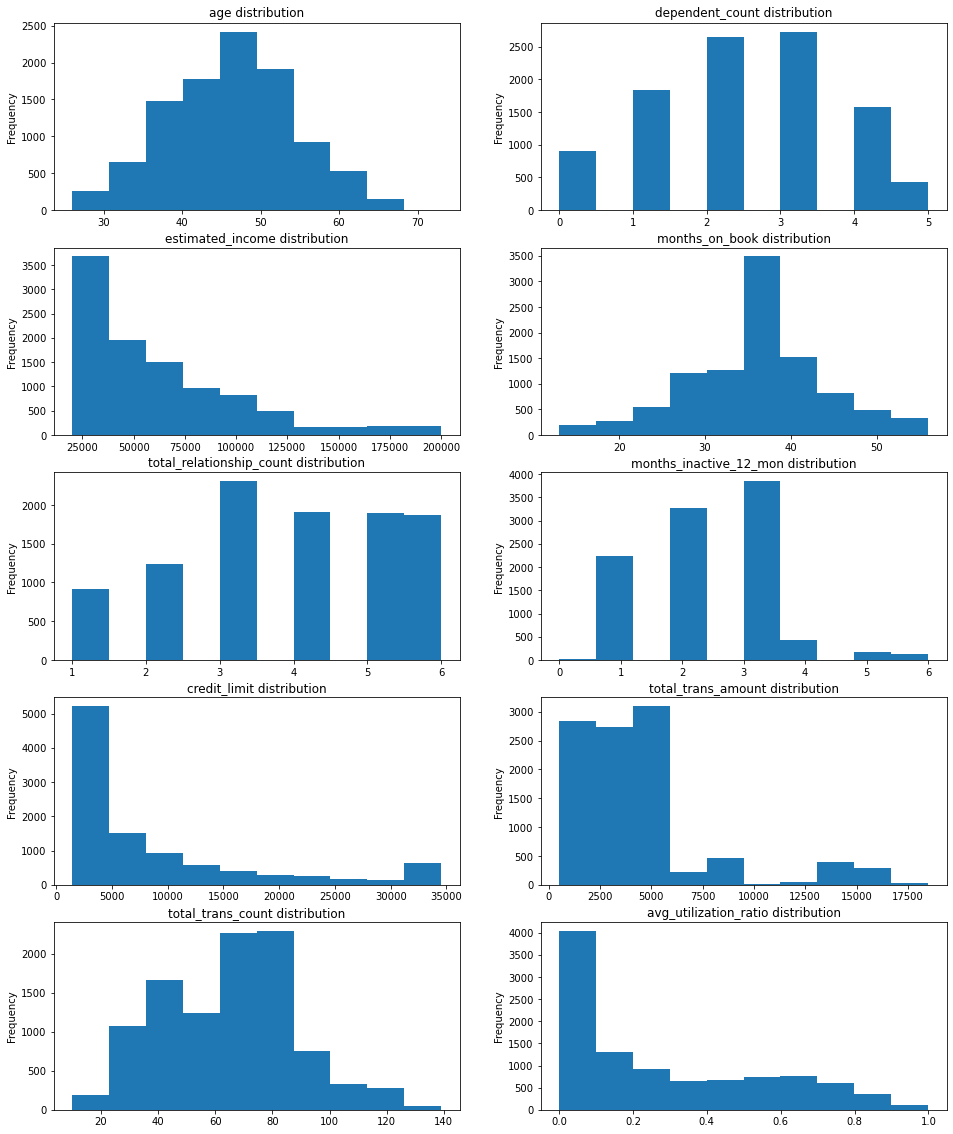

In [5]:
#Numeric Cols Visualized
fig_num = plt.figure(figsize=(16,20))

for idx, c in enumerate(num_cols):
    ax = plt.subplot(5,2,idx+1)
    df[c].plot.hist()
    plt.title(f'{c} distribution')

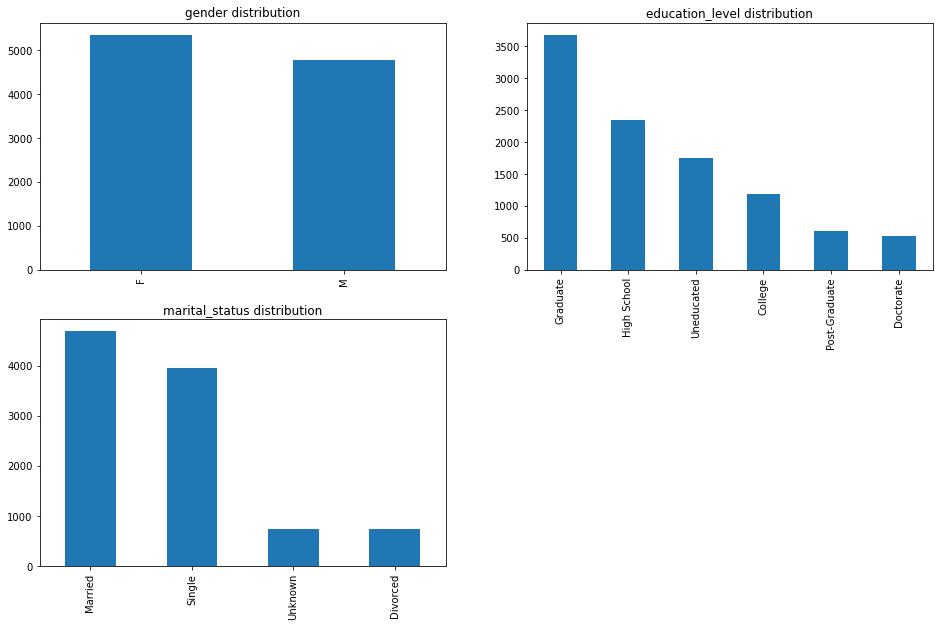

In [6]:
#Other Cols Visualized
fig_cat = plt.figure(figsize=(16,10))

for idx, c in enumerate(cat_cols):
    ax = plt.subplot(2,2,idx+1)
    df[c].value_counts().plot.bar()
    plt.title(f'{c} distribution')

<AxesSubplot:>

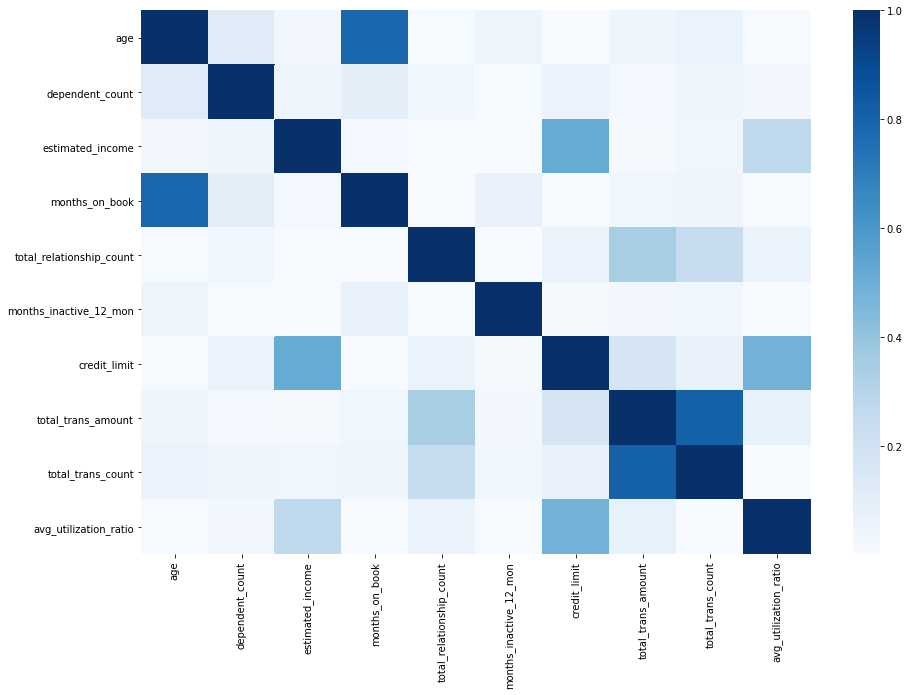

In [7]:
#Correlation Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(abs(df.drop('customer_id', axis=1).corr()), cmap='Blues')

#### Feature Engineering

In [8]:
df_modif = df.copy()

In [9]:
df_modif['gender']=df_modif['gender'].astype('category').cat.codes #converting gender to 1 and 0

In [10]:
map_dict = {'Uneducated':0,
            'High School':1,
            'College':2, 
            'Graduate':3,
            'Post-Graduate':4,
            'Doctorate':5}

In [11]:
df_modif['education_level'] = df_modif['education_level'].map(map_dict)

Now the only other categorical column is the Marital Status column. However, we can't use a similar technique as above to convert the values into an ordered list of numbers. There is no higher or lower with marital status. In this case, we will instead have to rely on the **one-hot-encoding** method of using dummies.

In [12]:
mar_dummy = pd.get_dummies(df['marital_status'])
df_modif = pd.concat([df_modif, mar_dummy], axis=1)
df_modif = df_modif.drop('marital_status', axis=1)

#### Scaling the Data

In [13]:
df_scale = df_modif.copy()
df_scale = df_scale.drop('customer_id', axis=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scale_stan = scaler.fit_transform(df_scale)
df_scale = pd.DataFrame(df_scale_stan, columns=df_scale.columns)

df_scale.head()

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,Divorced,Married,Single,Unknown
0,-0.165406,1.059956,0.503368,-0.752211,0.175810,0.384621,0.763943,-1.327136,0.446622,-0.959707,-0.973895,-0.775882,-0.282405,1.077338,-0.798507,-0.282609
1,0.333570,-0.943436,2.043199,0.662787,-0.967166,1.010715,1.407306,-1.327136,-0.041367,-0.916433,-1.357340,-0.616276,-0.282405,-0.928214,1.252337,-0.282609
2,0.583058,1.059956,0.503368,0.662787,0.785397,0.008965,0.120579,-1.327136,-0.573698,-0.740982,-1.911206,-0.997155,-0.282405,1.077338,-0.798507,-0.282609
3,-0.789126,-0.943436,1.273283,-0.752211,-0.636973,-0.241473,-0.522785,1.641478,-0.585251,-0.951758,-1.911206,1.759686,-0.282405,-0.928214,-0.798507,3.538459
4,-0.789126,1.059956,0.503368,-1.459710,0.074212,-1.869317,0.763943,-1.327136,-0.430877,-1.056263,-1.570365,-0.997155,-0.282405,1.077338,-0.798507,-0.282609


#### Choosing K

Now our dataset is ready for machine learning. The next step is to decide the best number of clusters to use in the segmentation according to the inertia metric.

We'll have to create several models and compute the inertia from each of them. Then, we'll be able to plot the Elbow Curve and decide the number of clusters we'll use to segment the customers. Once we do all that, we can perform the real clusterization.

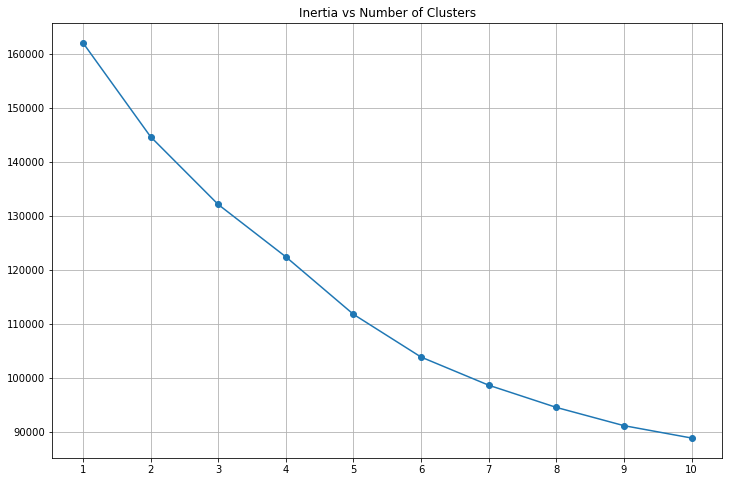

In [28]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1,11):
    kmean = KMeans(n_clusters=k)
    kmean.fit_predict(df_scale)
    inertia.append(kmean.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11),inertia, marker='o')
plt.xticks(ticks=range(1,11))
plt.title('Inertia vs Number of Clusters')

plt.grid()
plt.show()

Based on the chart above, 6 seems to be a reasonable number of clusters where adding more clusters from this point onwards does not seem to reduce inertia significantly.

#### Clustering with k-value of 6

In [15]:
cluster = KMeans(n_clusters=6)
predictions = cluster.fit_predict(df_scale)
df['CLUSTER'] = pd.Series(predictions)

In [16]:
df.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,CLUSTER
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,3
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,0
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,3
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,5
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,1


#### Analyzing the Clusters

In [29]:
df['CLUSTER'].value_counts()

1    3261
0    2883
3    1638
2     867
5     740
4     738
Name: CLUSTER, dtype: int64

<AxesSubplot:>

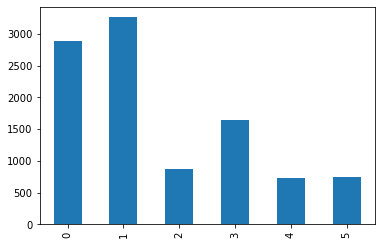

In [37]:
df['CLUSTER'].value_counts().sort_index().plot.bar()

**Distributions by Cluster**

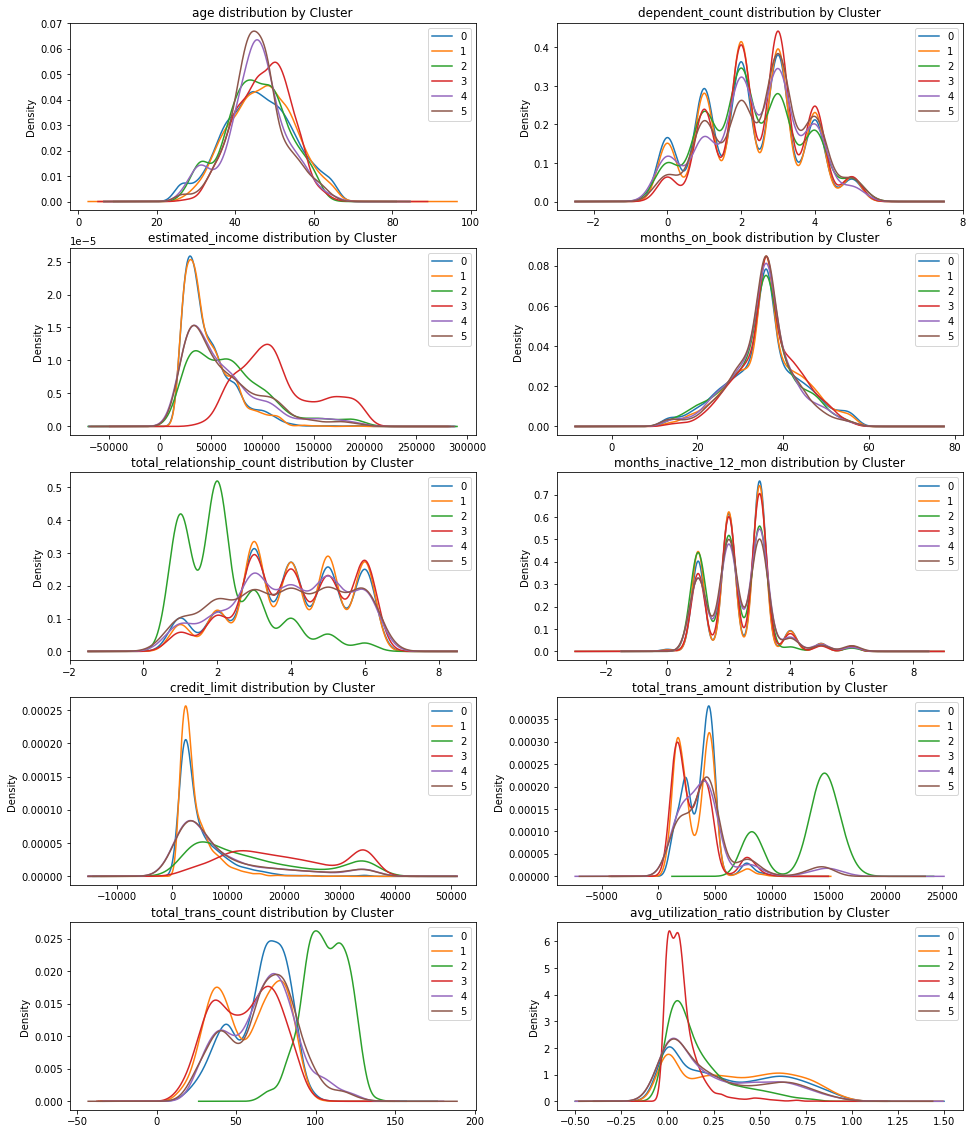

In [20]:
num_cols = df.select_dtypes('number').columns.drop(['customer_id','CLUSTER'])
cat_cols = df.select_dtypes('object').columns

#Numeric Cols Visualized
fig = plt.figure(figsize=(16,20))

for idx, c in enumerate(num_cols):
    ax = plt.subplot(5,2,idx+1)
    for cl in range(0,6):
        col = df.groupby('CLUSTER').get_group(cl)[c]
        col.plot.kde(label=f'{cl}')
    plt.legend()    
    plt.title(f'{c.title()} distribution by Cluster')

#### Aggregate Values by Cluster

In [40]:
(num_cols)

Index(['age', 'dependent_count', 'estimated_income', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon', 'credit_limit',
       'total_trans_amount', 'total_trans_count', 'avg_utilization_ratio'],
      dtype='object')

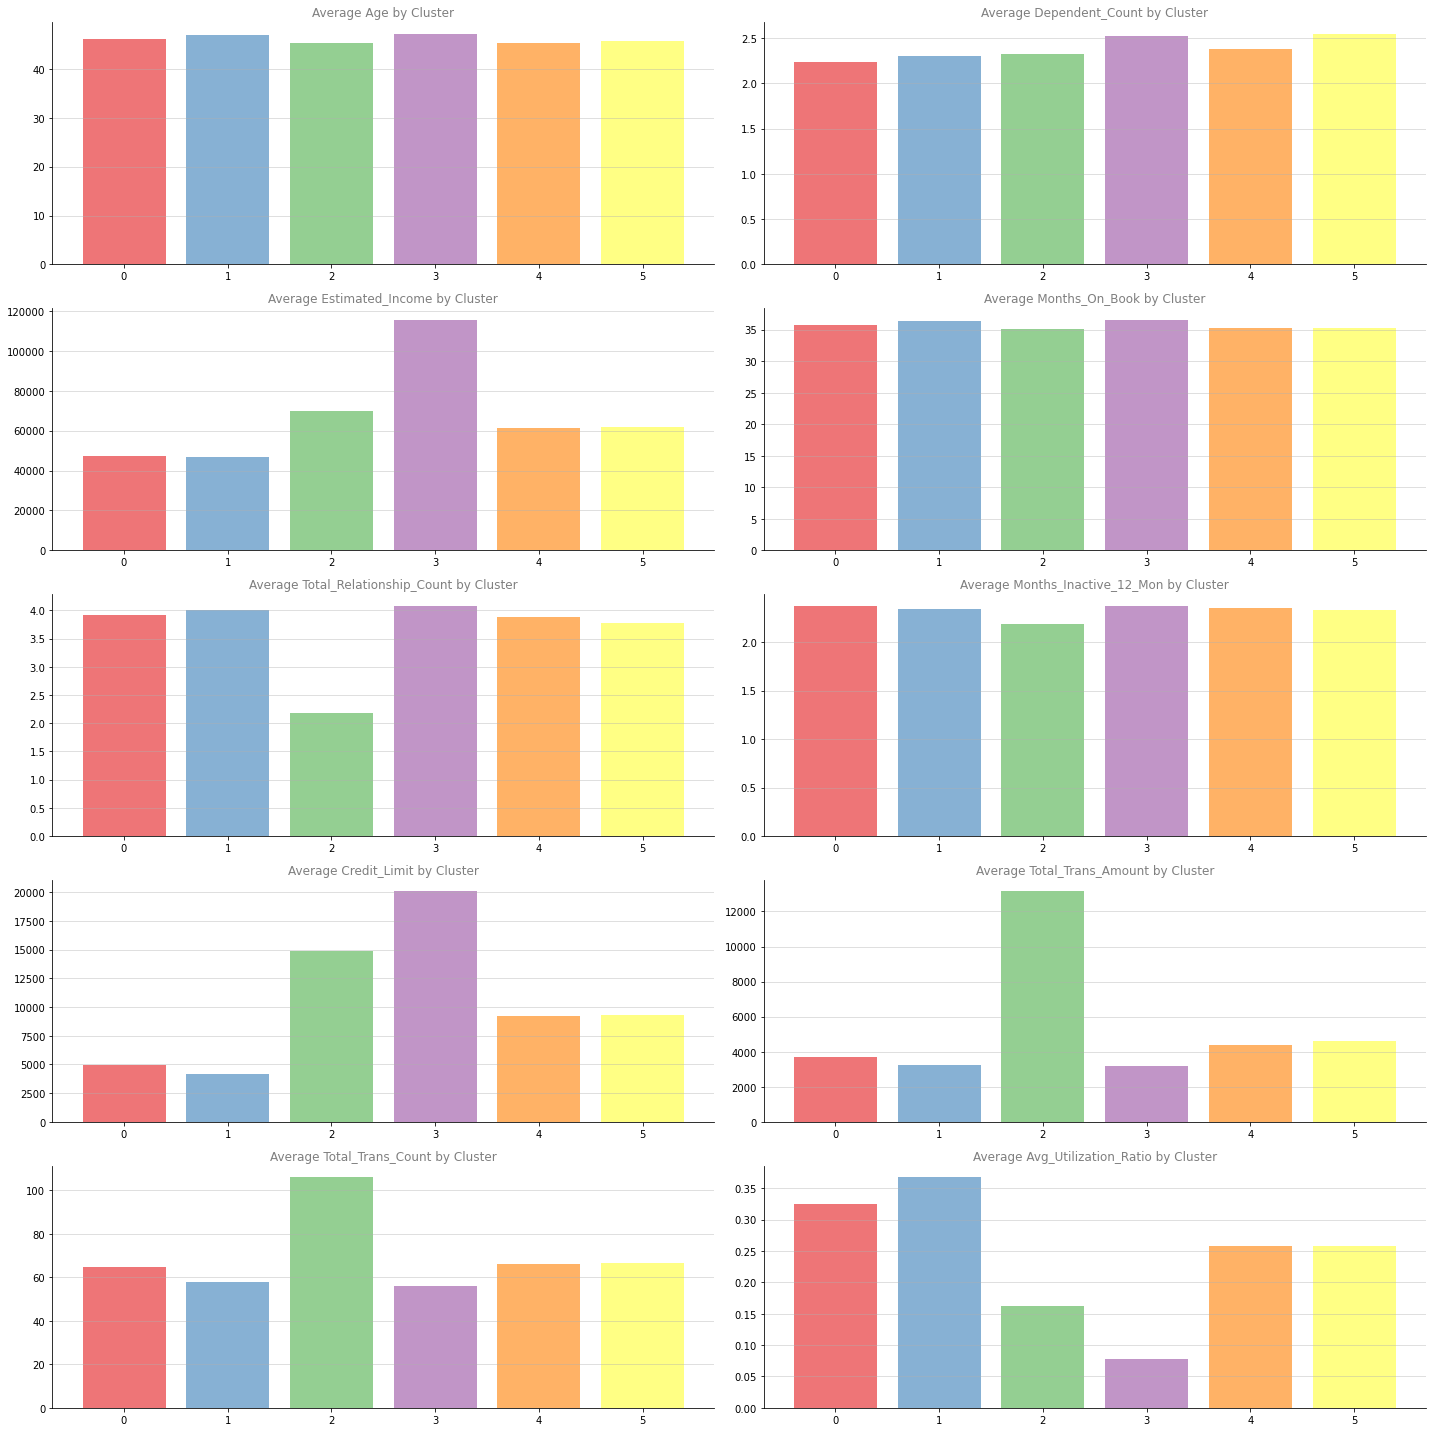

In [60]:
num_cols = df.select_dtypes('number').columns.drop(['customer_id','CLUSTER'])
cat_cols = df.select_dtypes('object').columns

#Numeric Cols Visualized
fig = plt.figure(figsize=(20,20))

for idx, c in enumerate(num_cols):
    ax = plt.subplot(5,2,idx+1)
    df_plot = df.groupby('CLUSTER').mean()[c]
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {c.title()} by Cluster', alpha=0.5)
    ax.xaxis.grid(False)
    ax.grid(True, axis='y', alpha=0.5)
    for i in ['right','top']:
        ax.spines[i].set_visible(False)

plt.tight_layout()
plt.show()

For those numerical variables with higher correlations we saw earlier, we can also use a scatter plot to visualize this correlation grouped by clusters and analyze how the clusters change between each area of the chart.

<AxesSubplot:>

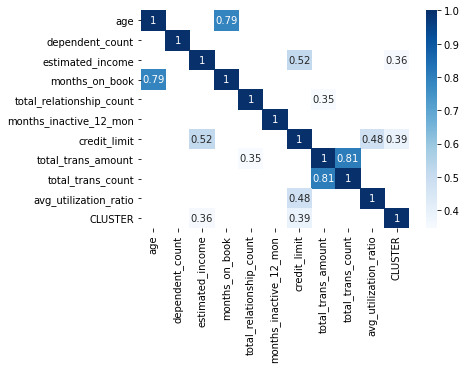

In [21]:
corr = abs(df.drop('customer_id', axis=1).corr())
sns.heatmap(corr[corr>0.3], cmap='Blues', annot=True)

#### Visualizing the Highly Correlated Columns by Clusters

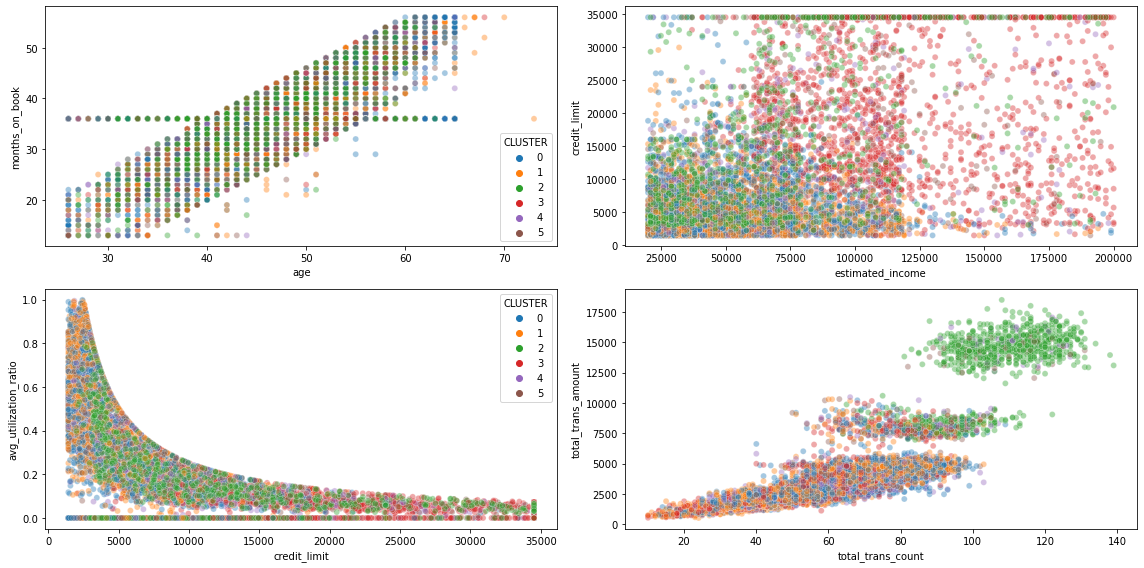

In [77]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))
sns.scatterplot(x='age', y='months_on_book', hue='CLUSTER', data=df, palette='tab10', alpha=0.4, ax=ax1)
sns.scatterplot(x='estimated_income', y='credit_limit', hue='CLUSTER', data=df, palette='tab10', alpha=0.4, ax=ax2, legend=False)
sns.scatterplot(x='credit_limit', y='avg_utilization_ratio', hue='CLUSTER', data=df, palette='tab10', alpha=0.4, ax=ax3)
sns.scatterplot(x='total_trans_count', y='total_trans_amount', hue='CLUSTER', data=df, palette='tab10', alpha=0.4, ax=ax4, legend=False)

plt.tight_layout()
plt.show()

#### Visualizing the Categorical Columns

In [78]:
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['gender', 'education_level', 'marital_status'], dtype='object')

<ipython-input-107-a5f88b4d15da>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)
<ipython-input-107-a5f88b4d15da>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)
<ipython-input-107-a5f88b4d15da>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


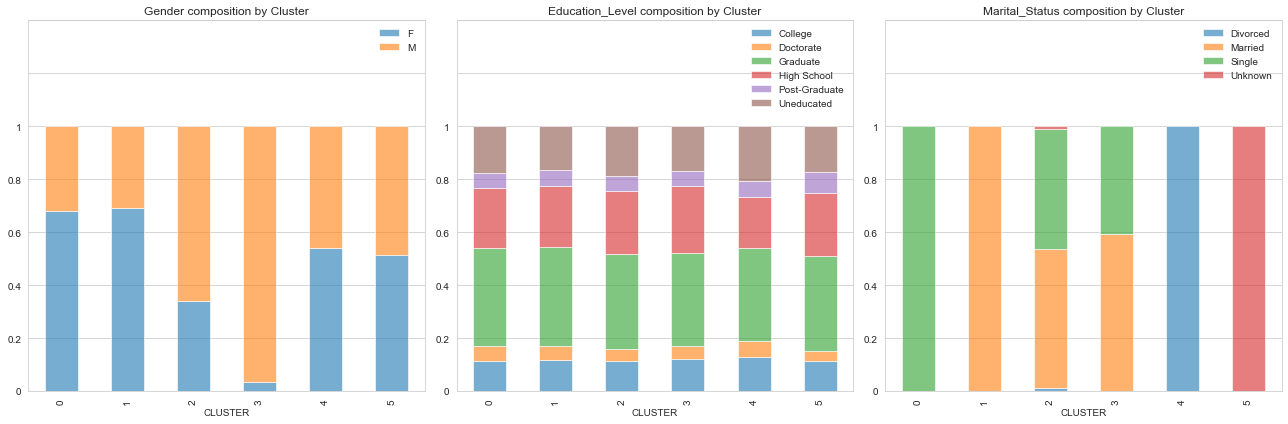

In [107]:
fig = plt.figure(figsize=(18,6))

for idx,c in enumerate(cat_cols):
    ax = fig.add_subplot(1,3,idx+1)
    df_plot = pd.crosstab(index=df['CLUSTER'], columns=df[c], normalize='index')
    df_plot.plot.bar(stacked=True, alpha=0.6, ax=ax)
    ax.set_title(f'{c.title()} composition by Cluster')

    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(None)
    
    labels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    ax.set_yticklabels(labels)

plt.tight_layout()
plt.show()

Finally, a list of all customers and their associated clusters:

In [109]:
df[['customer_id','CLUSTER']]

,customer_id,CLUSTER
0,768805383,3
1,818770008,0
2,713982108,3
3,769911858,5
4,709106358,1
...,...,...
10122,772366833,2
10123,710638233,4
10124,716506083,1
10125,717406983,5
